# automated explanatory data analysis with python

`Comprehensive Data Exploration Process with clicks`

The EDA process can be broken down into saveral steps as following

1. Know your data

2. Data manipulation and Feature engineering

3. Univariate Analysis

4. Multivariate Analysis

`So let's get started`

# 1.know your data

For this section I will be using some kaggle data set which can be found via links as well as in dataset folder.Feel free to experiment yourself.

### [Resturent Bussiness Rankings 2020](https://www.kaggle.com/michau96/restaurant-business-rankings-2020)

### [Reddit WallStreetBets Posts](https://www.kaggle.com/gpreda/reddit-wallstreetsbets-posts)

## Import Nessasary Libraries
I will be using two main libraries viz Numpy and Pandas <br> Seaborn and matplotlib for data vizualization.

In [23]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.api.types import is_string_dtype, is_numeric_dtype

## Import Data 

Let's create a datafrane from imported dataset and peek with head funtion.

`please check your dir later`

In [2]:
# reddit data
reddit_df = pd.read_csv('/home/ac2dc/Desktop/codes/Semi_auto Eda/datasets/reddit_wsb.csv')

In [3]:
reddit_df.head()

,title,score,id,url,comms_num,created,body,timestamp
0,"It's not about the money, it's about sending a...",55,l6ulcx,https://v.redd.it/6j75regs72e61,6,1.611863e+09,NaN,2021-01-28 21:37:41
1,Math Professor Scott Steiner says the numbers ...,110,l6uibd,https://v.redd.it/ah50lyny62e61,23,1.611862e+09,NaN,2021-01-28 21:32:10
2,Exit the system,0,l6uhhn,https://www.reddit.com/r/wallstreetbets/commen...,47,1.611862e+09,The CEO of NASDAQ pushed to halt trading “to g...,2021-01-28 21:30:35
3,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...,29,l6ugk6,https://sec.report/Document/0001193125-21-019848/,74,1.611862e+09,NaN,2021-01-28 21:28:57
4,"Not to distract from GME, just thought our AMC...",71,l6ufgy,https://i.redd.it/4h2sukb662e61.jpg,156,1.611862e+09,NaN,2021-01-28 21:26:56


In [4]:
# Resturent data
res_df = pd.read_csv('/home/ac2dc/Desktop/codes/Semi_auto Eda/datasets/Independence100.csv')

In [5]:
res_df.head()

,Rank,Restaurant,Sales,Average Check,City,State,Meals Served
0,1,Carmine's (Times Square),39080335.0,40,New York,N.Y.,469803.0
1,2,The Boathouse Orlando,35218364.0,43,Orlando,Fla.,820819.0
2,3,Old Ebbitt Grill,29104017.0,33,Washington,D.C.,892830.0
3,4,LAVO Italian Restaurant & Nightclub,26916180.0,90,New York,N.Y.,198500.0
4,5,Bryant Park Grill & Cafe,26900000.0,62,New York,N.Y.,403000.0


## Info()
It gives the count of non-null values for each column and it's data types.

In [6]:
reddit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53187 entries, 0 to 53186
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      53187 non-null  object 
 1   score      53187 non-null  int64  
 2   id         53187 non-null  object 
 3   url        53187 non-null  object 
 4   comms_num  53187 non-null  int64  
 5   created    53187 non-null  float64
 6   body       24738 non-null  object 
 7   timestamp  53187 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 3.2+ MB


In [7]:
res_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rank           100 non-null    int64  
 1   Restaurant     100 non-null    object 
 2   Sales          100 non-null    float64
 3   Average Check  100 non-null    int64  
 4   City           100 non-null    object 
 5   State          100 non-null    object 
 6   Meals Served   100 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 5.6+ KB


## Describe()
This funtion provides basic stats of each column.I am going to use <code> include='all'</code> to get output for catagorical values as well as numerical values.

In [8]:
reddit_df.describe(include='all')

,title,score,id,url,comms_num,created,body,timestamp
count,53187,53187.000000,53187,53187,53187.000000,5.318700e+04,24738,53187
unique,52049,NaN,53187,53172,NaN,NaN,24147,43460
top,AMC,NaN,l6ulcx,https://magic.freetrade.io/join/jamie/13edb513,NaN,NaN,Your daily trading discussion thread. Please k...,2021-01-29 01:03:59
freq,40,NaN,1,11,NaN,NaN,74,14
mean,NaN,1382.461053,NaN,NaN,263.260252,1.614582e+09,NaN,NaN
std,NaN,7999.271074,NaN,NaN,2532.665113,4.173566e+06,NaN,NaN
min,NaN,0.000000,NaN,NaN,0.000000,1.601340e+09,NaN,NaN
25%,NaN,2.000000,NaN,NaN,3.000000,1.611882e+09,NaN,NaN
50%,NaN,37.000000,NaN,NaN,17.000000,1.612488e+09,NaN,NaN
75%,NaN,207.000000,NaN,NaN,60.000000,1.615347e+09,NaN,NaN


In [9]:
res_df.describe(include='all')

,Rank,Restaurant,Sales,Average Check,City,State,Meals Served
count,100.000000,100,1.000000e+02,100.000000,100,100,100.000000
unique,NaN,95,NaN,NaN,36,19,NaN
top,NaN,"Joe's Seafood, Prime Steak & Stone Crab",NaN,NaN,New York,N.Y.,NaN
freq,NaN,3,NaN,NaN,21,21,NaN
mean,50.500000,NaN,1.783343e+07,69.050000,NaN,NaN,317166.660000
std,29.011492,NaN,5.010408e+06,34.735181,NaN,NaN,192211.390011
min,1.000000,NaN,1.139168e+07,17.000000,NaN,NaN,87070.000000
25%,25.750000,NaN,1.409484e+07,39.000000,NaN,NaN,189492.500000
50%,50.500000,NaN,1.730078e+07,65.500000,NaN,NaN,257097.000000
75%,75.250000,NaN,1.990392e+07,95.000000,NaN,NaN,372079.000000


## Missing values
Missing values such as NaN and null have to be normalized to get most accurate results for our analysis and future prediction.So removing them are crucial step of data analysis.

`This is the very important step,Don't ignore`

In [10]:
reddit_df.isnull().sum()

title            0
score            0
id               0
url              0
comms_num        0
created          0
body         28449
timestamp        0
dtype: int64

In [11]:
res_df.isnull().sum()

Rank             0
Restaurant       0
Sales            0
Average Check    0
City             0
State            0
Meals Served     0
dtype: int64

<b> As we can see reddit datasets indeed have some missing values,Which we have to take care later</b>

Let's find the missing values in terms of percentage and visualize it by barchart

In [12]:
missing_count = reddit_df.isnull().sum()
value_count = reddit_df.isnull().count()
missing_percent = round(missing_count / value_count *100,2) # rounding by two places
missing_df = pd.DataFrame({'count': missing_count, 'percentage':missing_percent})
print(missing_df)

           count  percentage
title          0        0.00
score          0        0.00
id             0        0.00
url            0        0.00
comms_num      0        0.00
created        0        0.00
body       28449       53.49
timestamp      0        0.00


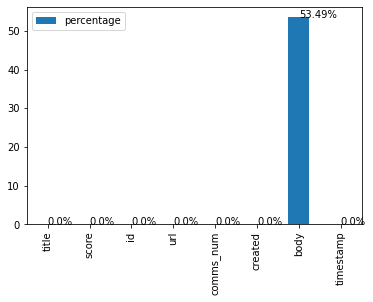

In [13]:
# visualization
barchart = missing_df.plot.bar(y='percentage')
for index, percentage in enumerate(missing_percent):
    barchart.text(index, percentage, str(percentage)+'%')

# Feature Engineering
### Feature engineering is the process of using domain knowledge to extract features (characteristics, properties, attributes) from raw data.A feature is a property shared by independent units on which analysis or prediction is to be done.Features are used by predictive models and influence results.Feature engineering has been employed in Kaggle competitions and machine learning projects.

`--via wikipwdia`


For the <code>reddit_wsb</code> dataset,Let us mainipulation on the existing data.

### 1. changing tittle_lenght naming and correlation analysis

In [15]:
reddit_df['title_lenght'] = reddit_df['title'].apply(len)

### 2. changing body field values to 'yes' or 'no

Since there are lots of missing values in body field,It can be transformed to more precious value that can be use as categorical variable

In [16]:
reddit_df['with_body'] = np.where(reddit_df['body'].isnull(), 'Yes', 'No')

### 3. Changing timestamp to month,which helps us to group data into lager dataset later

In [17]:
reddit_df['month'] = pd.to_datetime(reddit_df['timestamp']).dt.month.apply(str)

### 4. Droping not required fields like id, url, tittle, body etc for reddit dataset <br> For resturant dataset droping city fields 


In [19]:
reddit_df = reddit_df.drop(['id','url','timestamp','title','body'],axis=1)

In [20]:
res_df = res_df.drop(['Restaurant', 'City'],axis=1)

### Furthermore, the remaining variables are categorized into numerical and categorical, since univariate analysis and multivariate analysis require different approaches to handle different data types. “is_string_dtype” and “is_numeric_dtype” are handy functions to identify the data type of each field.

In [25]:
# list of numeric attributes and catagorical attributes for reddit dataset
num_list = []
cat_list = []
for column in  reddit_df:
    if is_numeric_dtype(reddit_df[column]):
        num_list.append(column)
    elif is_string_dtype(reddit_df[column]):
        cat_list.append(column)

print(num_list)
print(cat_list)

['score', 'comms_num', 'created', 'title_lenght']
['with_body', 'month']


In [26]:
 # list of numeric attributes and catagorical attributes restaurant dataset
num_list = []
cat_list = []
for column in res_df:
    if is_numeric_dtype(res_df[column]):
        num_list.append(column)
    elif is_string_dtype(res_df[column]):
        cat_list.append(column)

print(num_list)
print(cat_list)

['Rank', 'Sales', 'Average Check', 'Meals Served']
['State']


<b> After normalizing numerical and catagorical variable list,univariate and multivariate analysis can be automated

## 3. Univariate Analysis 
### [Univariate analysis](https://www.statisticshowto.com/univariate/) is the simplest form of analyzing data. “Uni” means “one”, so in other words your data has only one variable. It doesn’t deal with causes or relationships (unlike regression ) and it’s major purpose is to describe; It takes data, summarizes that data and finds patterns in the data. 
As describe() funtion already provided a univariate analysis in a non-graphical way,we will try to analyse it with graphical way using <code>Bar chart</code> for catagorical value and <code>Histogram</code> for numerical values.

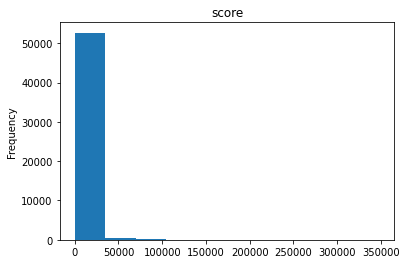

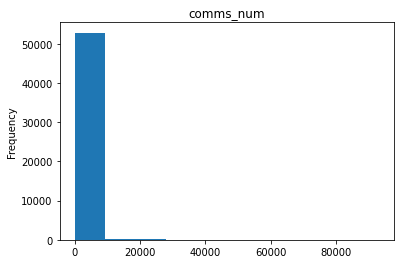

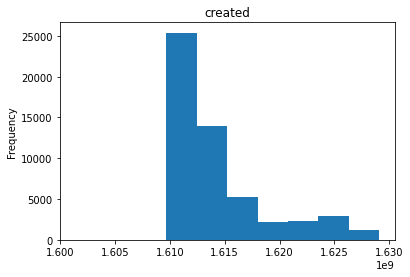

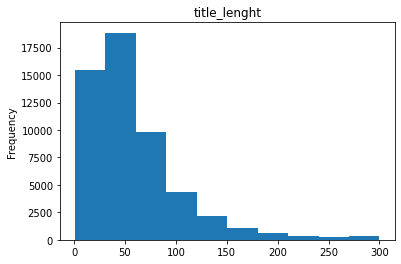

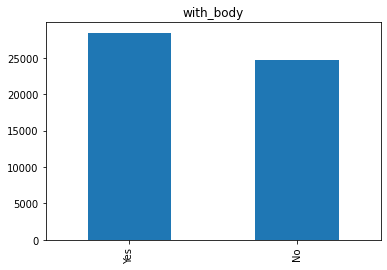

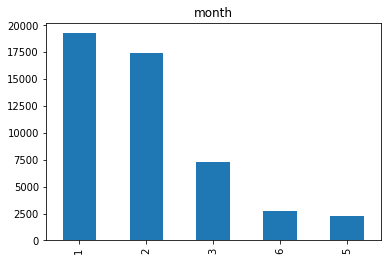

In [40]:
# reddit dataset ploting
for column in reddit_df:
    plt.figure(column)
    plt.title(column)
    if is_numeric_dtype(reddit_df[column]):
        reddit_df[column].plot(kind= 'hist')
    elif is_string_dtype(reddit_df[column]):
        reddit_df[column].value_counts()[:5].plot(kind = 'bar') # Top 5 only
    #plt.savefig('reddit-plots.png') ! 1st fig only saving idk what to do

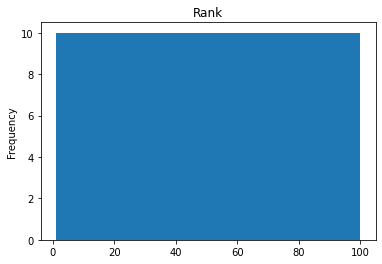

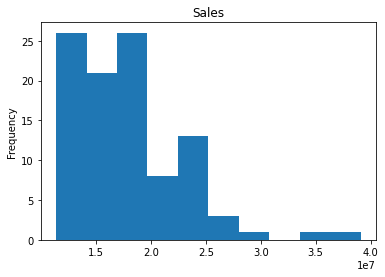

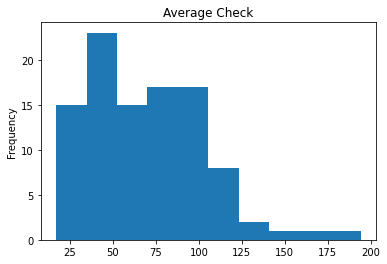

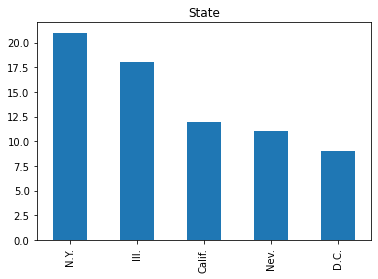

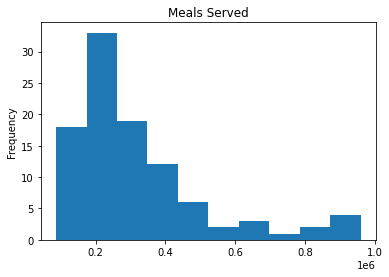

In [38]:
# for restaurant dataset
for column in res_df:
    plt.figure(column)
    plt.title(column)
    if is_numeric_dtype(res_df[column]):
        res_df[column].plot(kind= 'hist')
    elif is_string_dtype(res_df[column]):
        res_df[column].value_counts()[:5].plot(kind = 'bar') # Top 5 only
    #plt.savefig('res_df_plots.png')

## 4. Multivariate Analysis

Multivariate analysis is categorized into these three conditions to address various combinations of numerical variables and categorical variables.